In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import sys
sys.path.append('..')
import os

In [2]:
from similarity.IDK_Comp import IDK_Comp, IDK_Comp_att2
from similarity.Utilities import drawIDK_T_discords
from similarity.IDK_T import IDK_T

In [3]:
def find_subdirectory(target_subdir, parent_dir):

    """
       target_subdir: The file that you are looking for
       parent_dir: The Directory where you want to search

       returns
       dataset_dir: This is all the directories inside parent_dir that have the file target_subdir
    """

    target_dir = []
    target_dir.append(target_subdir)
    dataset_dir = []
        
    for root, dirs, files in os.walk(parent_dir):
            
        if target_dir == files:
                
            dataset_dir.append(os.path.join(root, target_subdir))
        
    return dataset_dir

In [4]:
parent_dir = f'../all_approx/Version_2/'

dir1 = find_subdirectory('test.csv', parent_dir)
dir1.sort()
dir1

['../all_approx/Version_2/approx_1/Approximation 1/test.csv',
 '../all_approx/Version_2/approx_2/Approximation 2/test.csv',
 '../all_approx/Version_2/approx_3/Approximation 2/test.csv',
 '../all_approx/Version_2/approx_4/Approximation 1/test.csv',
 '../all_approx/Version_2/approx_5/Approximation 2/test.csv',
 '../all_approx/Version_2/approx_6/Approximation6/test.csv',
 '../all_approx/Version_2/base-sine/base-sine/test.csv']

#### Reading all the simulated files and converting them to numpy array

In [5]:
base_df = pd.read_csv(dir1[-1])
app1_df = pd.read_csv(dir1[0])
app2_df = pd.read_csv(dir1[1])
app3_df = pd.read_csv(dir1[2])
app4_df = pd.read_csv(dir1[3])
app5_df = pd.read_csv(dir1[4])
app6_df = pd.read_csv(dir1[5])

In [6]:
def dftonp(df):
    return df['value-0'].values.reshape(-1, 1)

In [23]:
base_np = dftonp(base_df)
app1_np = dftonp(app1_df)
app2_np = dftonp(app2_df)
app3_np = dftonp(app3_df)
app4_np = dftonp(app4_df)
app5_np = dftonp(app5_df)
app6_np = dftonp(app6_df)

approximation_list = [app1_np, app2_np, app3_np, app4_np, app5_np, app6_np]

In [36]:
# Concatenating all approximations with the base approximation

concat1 = np.concatenate((base_np, app1_np))
concat2 = np.concatenate((base_np, app2_np))
concat3 = np.concatenate((base_np, app3_np))
concat4 = np.concatenate((base_np, app4_np))
concat5 = np.concatenate((base_np, app5_np))
concat6 = np.concatenate((base_np, app6_np))

In [61]:
# Parameters
width=500
psi1=8

#### Running the IDK_T Algorithm on Concatenated Data

In [54]:
similarity_score_1 = IDK_T(X=concat1, psi1=psi1, width=width, psi2=2)
similarity_score_2 = IDK_T(X=concat2, psi1=psi1, width=width, psi2=2)
similarity_score_3 = IDK_T(X=concat3, psi1=psi1, width=width, psi2=2)
similarity_score_4 = IDK_T(X=concat4, psi1=psi1, width=width, psi2=2)
similarity_score_5 = IDK_T(X=concat5, psi1=psi1, width=width, psi2=2)
similarity_score_6 = IDK_T(X=concat6, psi1=psi1, width=width, psi2=2)

#### Isolating the Approximation from the concatenated Score and taking their mean

In [55]:
def eval_sim(sim_score):

    len = concat1.shape[0]
    idx = int(len / (2 * width))

    sim_app = sim_score[idx:]
    sim_mean = np.mean(sim_app)

    return sim_mean, sim_app

In [56]:
sim1_mean, sim1_score = eval_sim(similarity_score_1)
sim2_mean, sim2_score = eval_sim(similarity_score_2)
sim3_mean, sim3_score = eval_sim(similarity_score_3)
sim4_mean, sim4_score = eval_sim(similarity_score_4)
sim5_mean, sim5_score = eval_sim(similarity_score_5)
sim6_mean, sim6_score = eval_sim(similarity_score_6)

In [57]:
print(sim1_mean) # 2 Similar
print(sim2_mean) # 1 Similar
print(sim3_mean) # 5 Similar
print(sim4_mean) # 6 Similar
print(sim5_mean) # 4 Similar
print(sim6_mean) # 3 Similar

0.43665000000000004
0.5365
0.33680000000000004
0.257
0.34775000000000006
0.41285


In [60]:
print(np.mean(similarity_score_1)) # 5
print(np.mean(similarity_score_2)) # 1
print(np.mean(similarity_score_3)) # 4
print(np.mean(similarity_score_4)) # 6
print(np.mean(similarity_score_5)) # 2
print(np.mean(similarity_score_6)) # 3

0.34985
0.42132500000000006
0.3655750000000001
0.32447500000000007
0.3999
0.3769


#### Plotting the approximation with the discordant points from the score

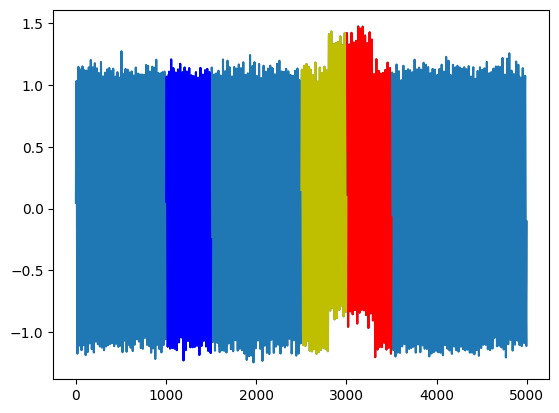

In [45]:
drawIDK_T_discords(app1_np, cycle=width, idk_scores=sim1_score)

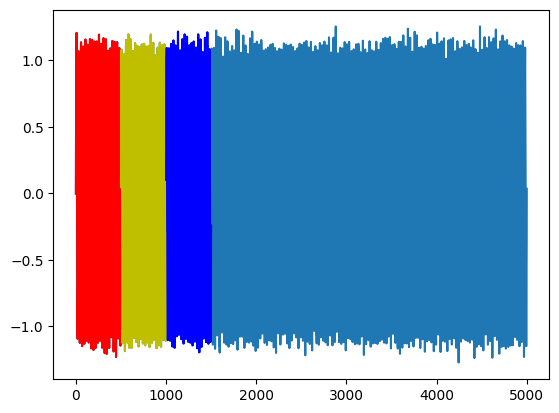

In [47]:
drawIDK_T_discords(app2_np, cycle=width, idk_scores=sim2_score)

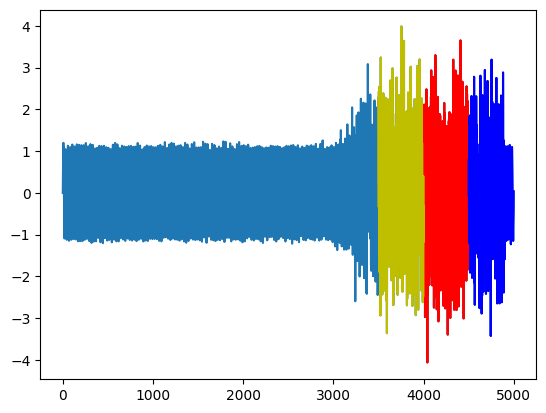

In [48]:
drawIDK_T_discords(app3_np, cycle=width, idk_scores=sim3_score)

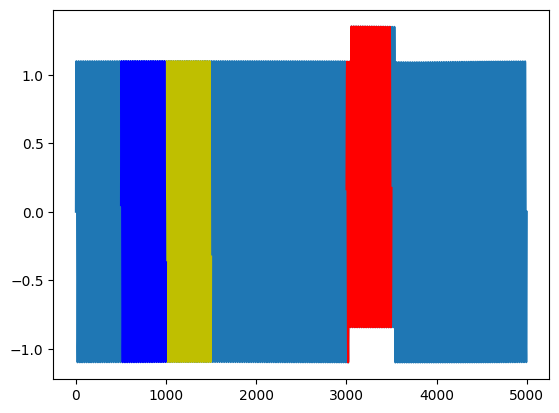

In [49]:
drawIDK_T_discords(app4_np, cycle=width, idk_scores=sim4_score)

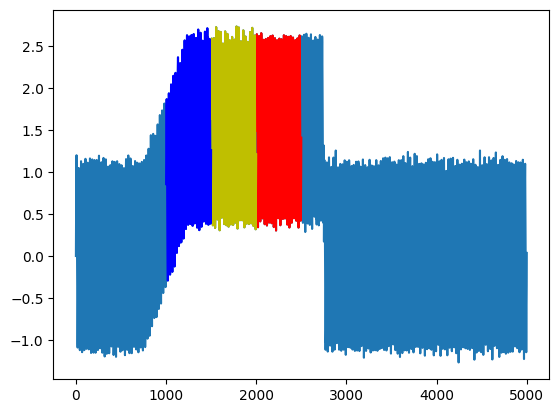

In [50]:
drawIDK_T_discords(app5_np, cycle=width, idk_scores=sim5_score)

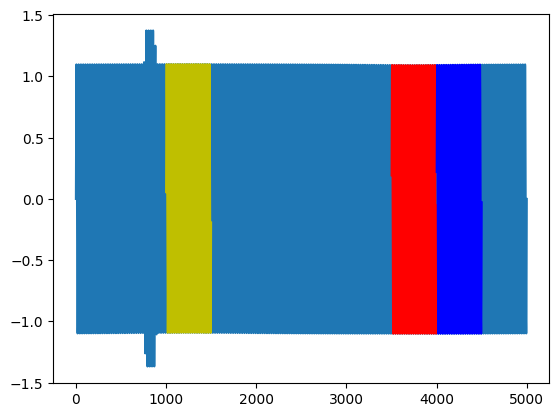

In [51]:
drawIDK_T_discords(app6_np, cycle=width, idk_scores=sim6_score)